Constained MOD
==============

This example demonstrates the use of [cmod.CnstrMOD](http://sporco.rtfd.org/en/latest/sporco.admm.cmod.html#sporco.admm.cmod.CnstrMOD) for computing a dictionary update via a constrained variant of the method of optimal directions [[13]](http://sporco.rtfd.org/en/latest/zreferences.html#engan-1999-method). This problem is mainly useful as a component within dictionary learning, but its use is demonstrated here since a user may wish to construct such objects as part of a custom dictionary learning algorithm, using [dictlrn.DictLearn](http://sporco.rtfd.org/en/latest/sporco.admm.dictlrn.html#sporco.admm.dictlrn.DictLearn).

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco.admm import bpdn
from sporco.admm import cmod
from sporco import util
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25, gray=True)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])

Extract all 8x8 image blocks, reshape, and subtract block means.

In [3]:
S = util.imageblocks((S1, S2, S3, S4, S5), (8, 8))
S = np.reshape(S, (np.prod(S.shape[0:2]), S.shape[2]))
S -= np.mean(S, axis=0)

Load initial dictionary.

In [4]:
D0 = util.convdicts()['G:8x8x64']
D0 = np.reshape(D0, (np.prod(D0.shape[0:2]), D0.shape[2]))

Compute sparse representation on current dictionary.

In [5]:
lmbda = 0.1
opt = bpdn.BPDN.Options({'Verbose': True, 'MaxMainIter': 200,
                         'RelStopTol': 1e-3})
b = bpdn.BPDN(D0, S, lmbda, opt)
X = b.solve()

Itn   Fnc       DFid      Regℓ1     r         s         ρ         
----------------------------------------------------------------


   0  2.82e+04  2.17e+04  6.42e+04  3.57e-01  2.39e+00  6.00e+00


   1  2.60e+04  1.83e+04  7.72e+04  1.48e-01  1.05e+00  6.00e+00


   2  2.51e+04  1.70e+04  8.16e+04  8.47e-02  6.81e-01  6.00e+00


   3  2.46e+04  1.62e+04  8.43e+04  6.00e-02  5.43e-01  6.00e+00


   4  2.43e+04  1.57e+04  8.59e+04  4.50e-02  4.39e-01  6.00e+00


   5  2.40e+04  1.53e+04  8.71e+04  3.57e-02  3.77e-01  6.00e+00


   6  2.39e+04  1.51e+04  8.80e+04  2.91e-02  3.25e-01  6.00e+00


   7  2.37e+04  1.49e+04  8.86e+04  2.44e-02  2.88e-01  6.00e+00


   8  2.36e+04  1.47e+04  8.92e+04  2.08e-02  2.57e-01  6.00e+00


   9  2.36e+04  1.46e+04  8.96e+04  1.80e-02  2.32e-01  6.00e+00


  10  2.33e+04  1.42e+04  9.16e+04  6.83e-02  1.86e-01  1.18e+00


  11  2.32e+04  1.40e+04  9.24e+04  5.14e-02  1.33e-01  1.18e+00


  12  2.31e+04  1.39e+04  9.24e+04  3.74e-02  9.66e-02  1.18e+00


  13  2.31e+04  1.39e+04  9.25e+04  2.79e-02  7.35e-02  1.18e+00


  14  2.31e+04  1.38e+04  9.26e+04  2.13e-02  5.75e-02  1.18e+00


  15  2.31e+04  1.38e+04  9.27e+04  1.66e-02  4.59e-02  1.18e+00


  16  2.31e+04  1.38e+04  9.28e+04  1.31e-02  3.73e-02  1.18e+00


  17  2.31e+04  1.38e+04  9.29e+04  1.06e-02  3.08e-02  1.18e+00


  18  2.31e+04  1.38e+04  9.29e+04  8.62e-03  2.58e-02  1.18e+00


  19  2.30e+04  1.37e+04  9.30e+04  7.13e-03  2.18e-02  1.18e+00


  20  2.30e+04  1.37e+04  9.31e+04  1.38e-02  1.79e-02  4.78e-01


  21  2.30e+04  1.37e+04  9.32e+04  1.16e-02  1.37e-02  4.78e-01


  22  2.30e+04  1.37e+04  9.32e+04  9.31e-03  1.03e-02  4.78e-01


  23  2.30e+04  1.37e+04  9.33e+04  7.34e-03  7.80e-03  4.78e-01


  24  2.30e+04  1.37e+04  9.33e+04  5.74e-03  6.01e-03  4.78e-01


  25  2.30e+04  1.37e+04  9.33e+04  4.49e-03  4.71e-03  4.78e-01


  26  2.30e+04  1.37e+04  9.33e+04  3.53e-03  3.73e-03  4.78e-01


  27  2.30e+04  1.37e+04  9.33e+04  2.79e-03  3.00e-03  4.78e-01


  28  2.30e+04  1.37e+04  9.33e+04  2.23e-03  2.44e-03  4.78e-01


  29  2.30e+04  1.37e+04  9.33e+04  1.79e-03  2.00e-03  4.78e-01


  30  2.30e+04  1.37e+04  9.33e+04  1.98e-03  1.62e-03  3.20e-01


  31  2.30e+04  1.37e+04  9.33e+04  1.67e-03  1.28e-03  3.20e-01


  32  2.30e+04  1.37e+04  9.33e+04  1.38e-03  1.01e-03  3.20e-01


  33  2.30e+04  1.37e+04  9.33e+04  1.13e-03  8.09e-04  3.20e-01


  34  2.30e+04  1.37e+04  9.33e+04  9.18e-04  6.54e-04  3.20e-01
----------------------------------------------------------------


Update dictionary for training image set.

In [6]:
opt = cmod.CnstrMOD.Options({'Verbose': True, 'MaxMainIter': 100,
                             'RelStopTol': 1e-3, 'rho': 4e2})
c = cmod.CnstrMOD(X, S, None, opt)
D1 = c.solve()
print("CMOD solve time: %.2fs" % c.timer.elapsed('solve'))

Itn   DFid      Cnstr     r         s         ρ         
------------------------------------------------------
   0  1.18e+04  1.20e-15  4.40e-01  2.38e+00  4.00e+02


   1  1.17e+04  1.50e-15  1.96e-01  2.03e-01  4.00e+02
   2  1.16e+04  1.29e-15  9.02e-02  6.58e-02  4.00e+02


   3  1.16e+04  1.40e-15  4.38e-02  2.76e-02  4.00e+02
   4  1.16e+04  1.34e-15  2.35e-02  1.26e-02  4.00e+02


   5  1.16e+04  1.42e-15  1.31e-02  7.36e-03  4.00e+02
   6  1.16e+04  1.24e-15  7.48e-03  4.20e-03  4.00e+02


   7  1.16e+04  1.41e-15  4.37e-03  2.71e-03  4.00e+02
   8  1.16e+04  1.31e-15  2.59e-03  1.71e-03  4.00e+02


   9  1.16e+04  1.29e-15  1.56e-03  1.15e-03  4.00e+02
  10  1.16e+04  1.38e-15  9.58e-04  7.63e-04  4.00e+02
------------------------------------------------------
CMOD solve time: 0.71s


Display initial and final dictionaries.

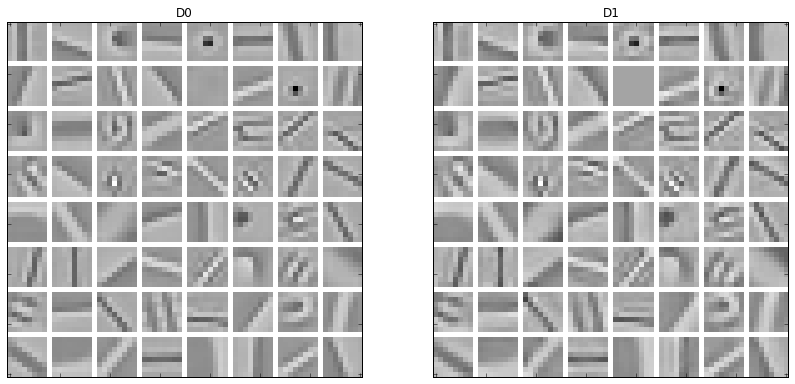

In [7]:
D0 = D0.reshape((8, 8, D0.shape[-1]))
D1 = D1.reshape((8, 8, D1.shape[-1]))
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

Get iterations statistics from CMOD solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

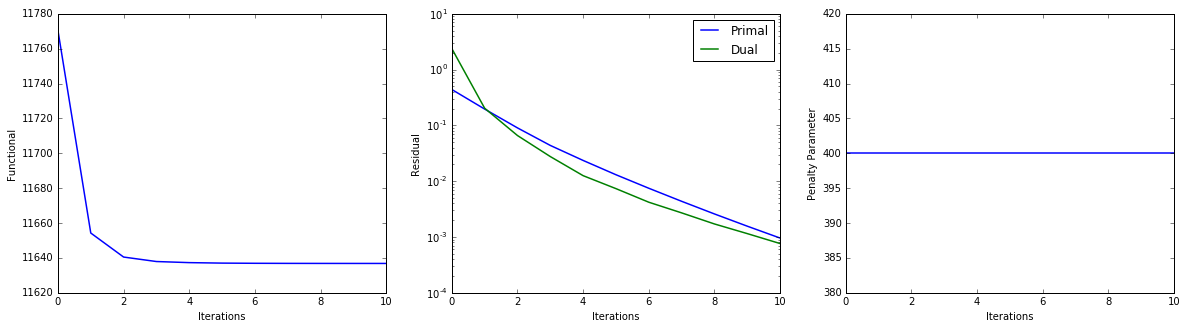

In [8]:
its = c.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.DFid, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()